# Question 3

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
#a） 
len(df)


731

#Based on day.csv, it has 731 observations and 16 attributes.

In [4]:
#b）
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [5]:
#c） Check what data types the pandas has inferred and if any of the features require data conversions.
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

the features that need data conversions are season, holiday, workingday, weekday, weathersit, mnth and yr as they are more suitable to be placed in category like for example season can be categorize into winter, summer, spring and autumn.

In [6]:
#d）
nd = df.rename(columns = {'instant':'rec_id',
                                'dteday':'datetime',
                                'holiday':'is_holiday',
                                'workingday':'is_workingday',
                                'weathersit':'weather_condition',
                                'hum':'humidity',
                                'mnth':'month',
                                'cnt':'total_count',
                                'yr':'year'})

In [7]:
#d Then, display the new top 10 rows to show the new attribute names.
nd.head(10)

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [8]:
#e）

In [9]:
nd['is_holiday'].astype('category')

0      0
1      0
2      0
3      0
4      0
      ..
726    0
727    0
728    0
729    0
730    0
Name: is_holiday, Length: 731, dtype: category
Categories (2, int64): [0, 1]

In [10]:
nd['is_workingday'].astype('category')

0      0
1      0
2      1
3      1
4      1
      ..
726    1
727    1
728    0
729    0
730    1
Name: is_workingday, Length: 731, dtype: category
Categories (2, int64): [0, 1]

In [11]:
nd['weekday'].astype('category')

0      6
1      0
2      1
3      2
4      3
      ..
726    4
727    5
728    6
729    0
730    1
Name: weekday, Length: 731, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [12]:
nd['weather_condition'].astype('category')

0      2
1      2
2      1
3      1
4      1
      ..
726    2
727    2
728    2
729    1
730    2
Name: weather_condition, Length: 731, dtype: category
Categories (3, int64): [1, 2, 3]

In [13]:
nd['month'].astype('category')

0       1
1       1
2       1
3       1
4       1
       ..
726    12
727    12
728    12
729    12
730    12
Name: month, Length: 731, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [14]:
nd['year'].astype('category')

0      0
1      0
2      0
3      0
4      0
      ..
726    1
727    1
728    1
729    1
730    1
Name: year, Length: 731, dtype: category
Categories (2, int64): [0, 1]

In [15]:
#f)
nd.describe(include='all')

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [16]:
#g)
nd.isnull

<bound method DataFrame.isnull of      rec_id    datetime  season  year  month  is_holiday  weekday  \
0         1  2011-01-01       1     0      1           0        6   
1         2  2011-01-02       1     0      1           0        0   
2         3  2011-01-03       1     0      1           0        1   
3         4  2011-01-04       1     0      1           0        2   
4         5  2011-01-05       1     0      1           0        3   
..      ...         ...     ...   ...    ...         ...      ...   
726     727  2012-12-27       1     1     12           0        4   
727     728  2012-12-28       1     1     12           0        5   
728     729  2012-12-29       1     1     12           0        6   
729     730  2012-12-30       1     1     12           0        0   
730     731  2012-12-31       1     1     12           0        1   

     is_workingday  weather_condition      temp     atemp  humidity  \
0                0                  2  0.344167  0.363625  0.80583

In [17]:
#h)
nd.drop(['rec_id','datetime','casual','registered'],axis=1)

,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [18]:
#h)
nd.head(10)

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_count'>

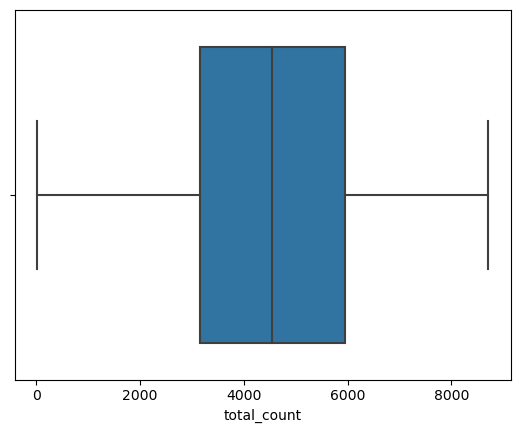

In [23]:
#i)
import seaborn as sns
sns.boxplot(nd['total_count'])

No outliers for total count.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

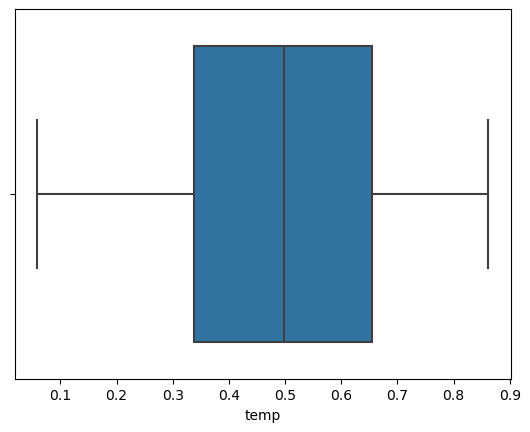

In [24]:
sns.boxplot(nd['temp'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

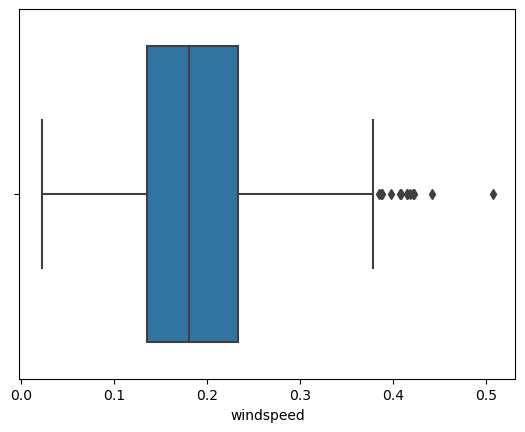

In [25]:
sns.boxplot(nd['windspeed'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity'>

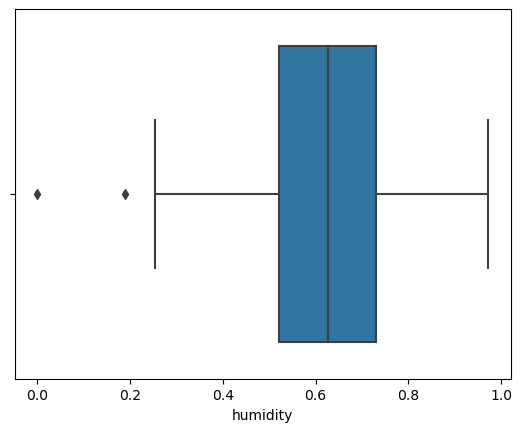

In [26]:
sns.boxplot(nd['humidity'])

2 outliers for humidity

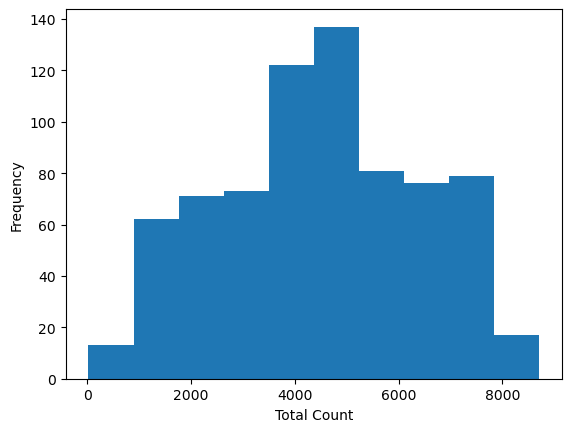

In [27]:
#j)
plt.hist(nd['total_count'])
plt.xlabel('Total Count')
plt.ylabel('Frequency')
plt.show()

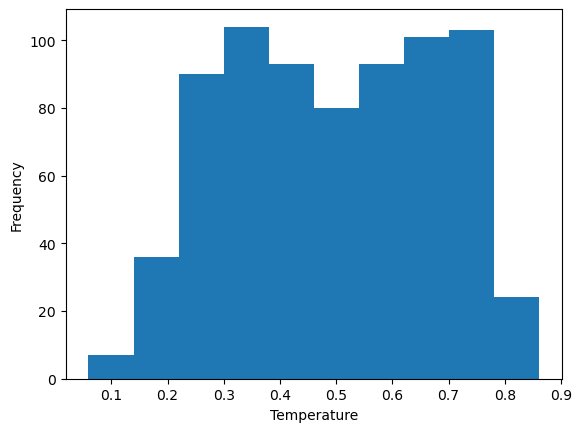

In [28]:
plt.hist(nd['temp'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

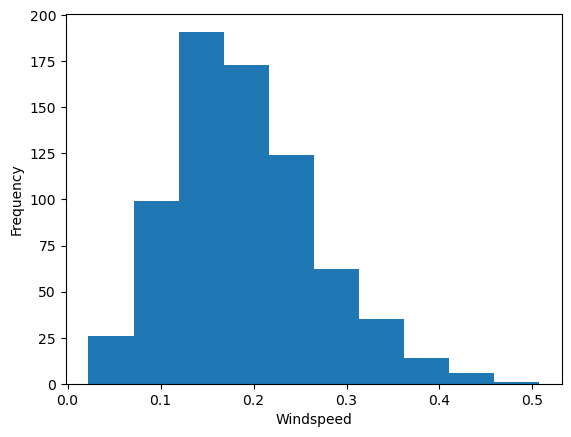

In [29]:
plt.hist(nd['windspeed'])
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

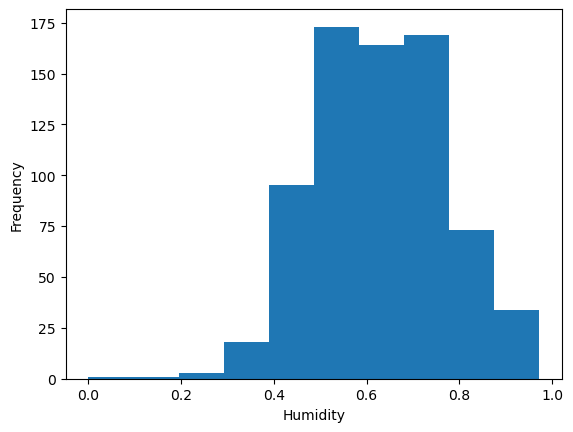

In [30]:
plt.hist(nd['humidity'])
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()